In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [89]:
# Data Loading and Exploration:

df = pd.read_csv("HW1_house_data(1).csv")

print("Dataset Statistics:")
print(df.describe())
print("\nHead of the dataset:")
print(df.head())

Dataset Statistics:
             area          price
count   100.00000     100.000000
mean   2247.97960  562990.340700
std     453.86445  113464.467239
min    1522.16000  381657.070000
25%    1812.84750  454164.525000
50%    2284.15000  571887.305000
75%    2617.72750  655407.227500
max    2995.40000  749686.490000

Head of the dataset:
      area      price
0  2231.88  558852.17
1  2524.92  632260.29
2  1527.65  382994.25
3  1986.09  497607.86
4  2920.16  730870.84


In [90]:
# Extract the input feature into X and the output into y
X = df["area"].values
y = df["price"].values

# Normalize the input features
NormlizedX = (X-X.mean())/X.std()

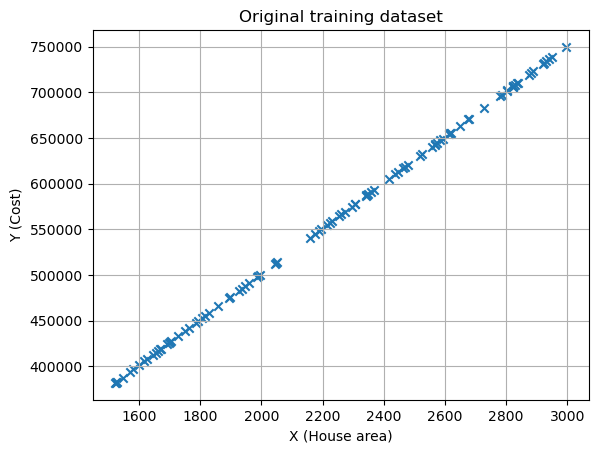

In [91]:
# Draw a scatter plot
plt.scatter(X,y,marker='x')
plt.xlabel('X (House area)')
plt.ylabel('Y (Cost)')
plt.title('Original training dataset')
plt.grid(True)
plt.show()

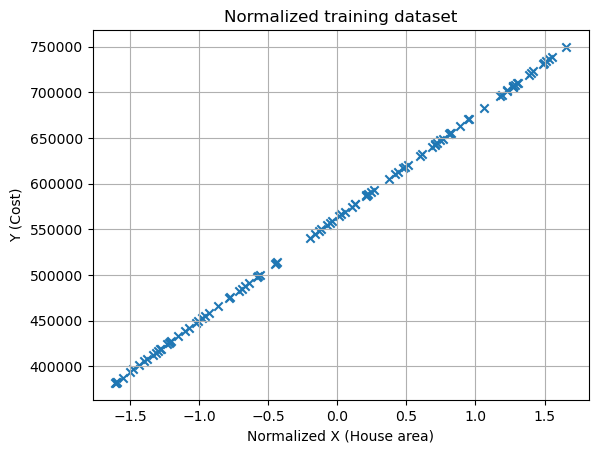

In [92]:
# Plot the data after normalization
plt.scatter(NormlizedX,y,marker='x')
plt.xlabel('Normalized X (House area)')
plt.ylabel('Y (Cost)')
plt.title('Normalized training dataset')
plt.grid(True)
plt.show()

In [93]:
# Linear regression using  self-coded batch GD training and prediction
eta = 0.01
n_iterations = 1000
m =len(y)
theta0 = 0
theta1 = 0

for iteration in range(n_iterations):
    PredictedY = theta0 + theta1 * NormlizedX
    gradient0 = (1/m) * np.sum(PredictedY-y)
    gradient1 = (1/m) * np.sum((PredictedY-y) * NormlizedX)
    theta0 -= eta * gradient0
    theta1 -= eta * gradient1

print("𝜃0: ",theta0)
print("𝜃1: ",theta1)

NormalizedArea2000 = (2000-X.mean())/X.std()
PredictedPrice = theta0+theta1* NormalizedArea2000
print("Predicted price for a house with an area of 2000:",PredictedPrice)


𝜃0:  562966.0357047117
𝜃1:  112890.79348255106
Predicted price for a house with an area of 2000: 500974.7396107308


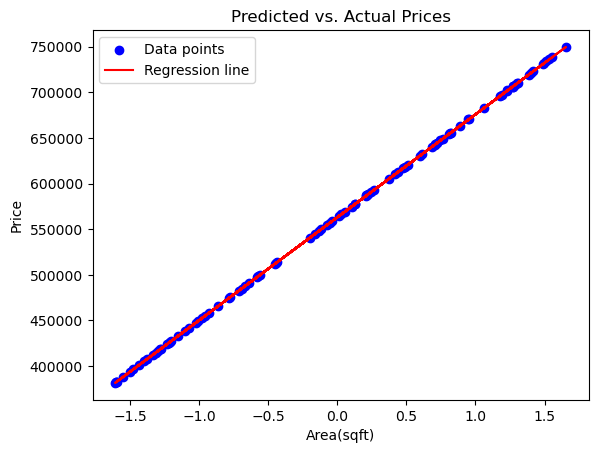

In [94]:
# Plot predicted versus actual values
plt.scatter(NormlizedX,y,marker='o',c='b',label='Data points')
plt.plot(NormlizedX,PredictedY,c='r',label='Regression line')
plt.xlabel("Area(sqft)")
plt.ylabel("Price")
plt.title("Predicted vs. Actual Prices")
plt.legend()
plt.show()

In [95]:
#Linear regression using  Sklearn library training and prediction
model = LinearRegression()
model.fit(NormlizedX.reshape(-1,1),y)
print("Linear Regression Model Parameters:")
print("𝜃0: ",model.intercept_)
print("𝜃1: ",model.coef_)
PredictedPrice1 = model.predict([[NormalizedArea2000]])
print("Predicted price for a house with an area of 2000:",PredictedPrice1)

Linear Regression Model Parameters:
𝜃0:  562990.3407000001
𝜃1:  [112895.66732934]
Predicted price for a house with an area of 2000: [500996.3682489]


In [96]:
#Linear regression using  the normal equation method training and prediction
X_b = np.c_[np.ones(NormlizedX.shape[0]),NormlizedX]
ThetaValues = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Normal equation Parameters:")
print("𝜃0: ",ThetaValues[0])
print("𝜃1: ",ThetaValues[1])
PredictedPrice2 = ThetaValues[0]+ThetaValues[1]* NormalizedArea2000
print("Predicted price for a house with an area of 2000:",PredictedPrice2)


Normal equation Parameters:
𝜃0:  562990.3407000001
𝜃1:  112895.6673293369
Predicted price for a house with an area of 2000: 500996.36824889656
